In [26]:
#pipenv install pandas seaborn ppscore setuptools nbformat matplotlib scikit-learn ipywidgets ipykernel shap plotly

import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [7]:
# Carregar o conjunto de dados
df = pd.read_csv('./datasets/dataset_colesterol.csv')

In [4]:
# Visualizar estrutura do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [8]:
# Ajustar DataFrame

# Remover a coluna 'Id'
df.drop('Id', axis=1, inplace=True)

# Aplicar OneHotEncoding nas variáveis Grupo Sanguíneo, Fumante, Nível de Atividade
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [9]:
# Visualizar o conjunto de dados ajustado
df

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,0,0,1,0,0,1,0,1,0
1,68,105.0,184,236.98,1,0,0,0,1,0,0,0,1
2,25,64.8,180,161.79,0,0,0,1,1,0,1,0,0
3,43,120.2,167,336.24,1,0,0,0,1,0,1,0,0
4,79,88.5,175,226.23,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,68.1,166,206.81,0,1,0,0,0,1,0,0,1
996,51,47.7,170,128.03,0,0,0,1,1,0,1,0,0
997,39,85.5,176,211.14,0,1,0,0,1,0,0,1,0
998,61,91.2,161,284.53,0,1,0,0,0,1,0,1,0


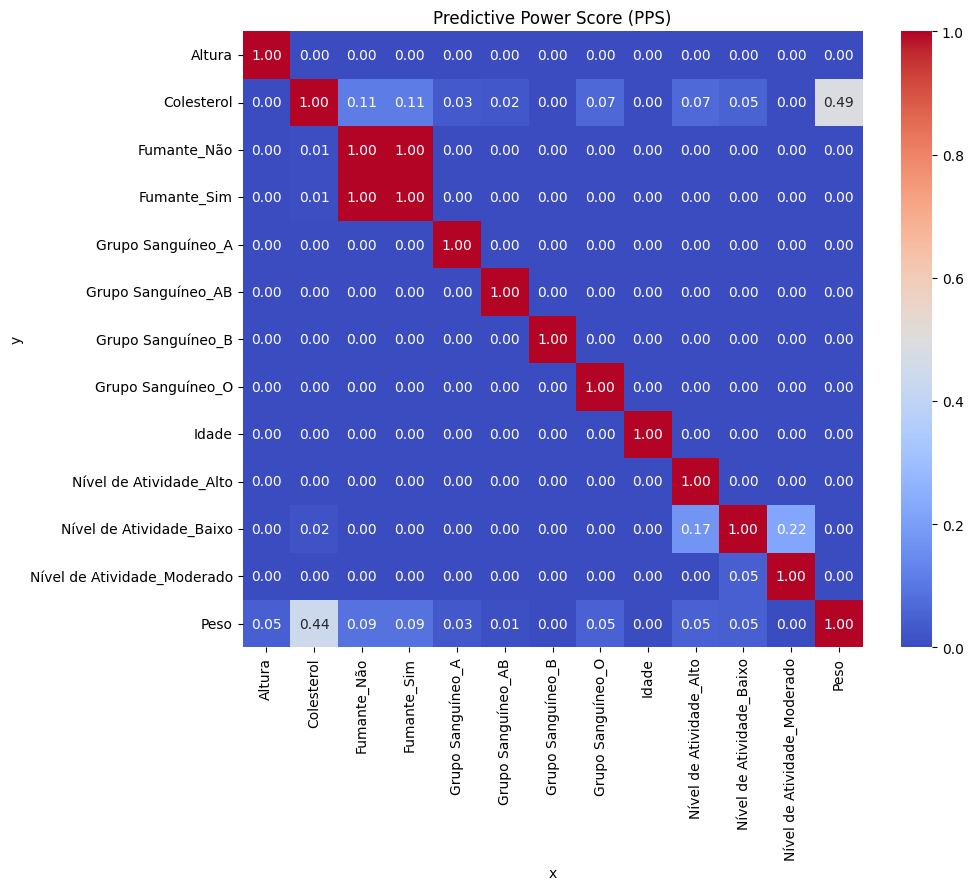

In [11]:
# Calcular o PPS entre as variáveis independentes e a variável dependente
pps_matrix = pps.matrix(df)

# Ajustar Matriz para Plot
pps_matrix_pivot = pps_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Plotar a matriz de PPS
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Predictive Power Score (PPS)')
plt.show()

In [18]:
# Exemplo de PPS entre as variáveis
pps.score(df, 'Peso', 'Colesterol')

{'x': 'Peso',
 'y': 'Colesterol',
 'ppscore': 0.4905771278030162,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 40.1725,
 'model_score': 20.464790333333333,
 'model': DecisionTreeRegressor()}

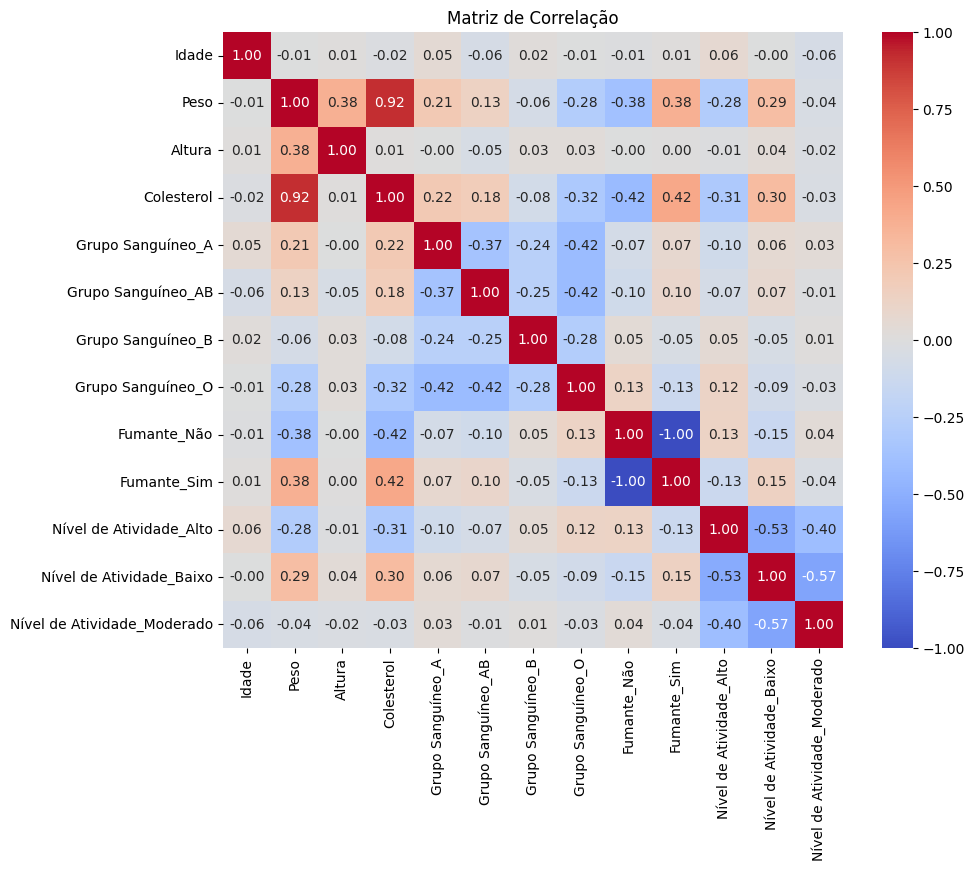

In [12]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [13]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [14]:
# Ajustar o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X, y)

LinearRegression()

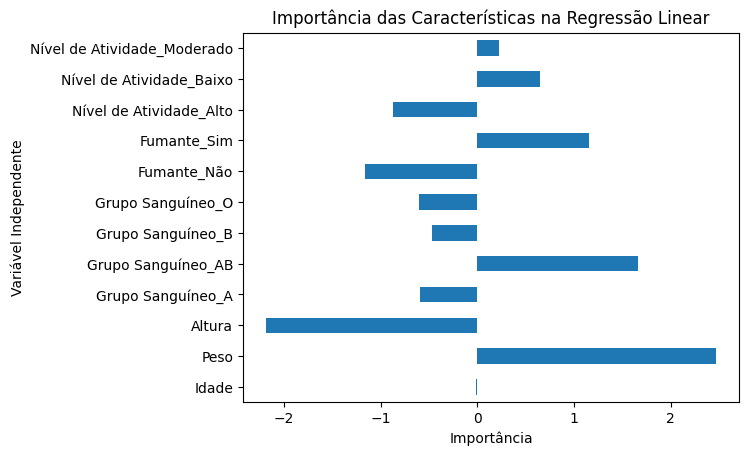

In [15]:
# Avaliar a importância das características com base nos coeficientes do modelo
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Variável Independente')
plt.title('Importância das Características na Regressão Linear')
plt.show()

In [28]:
# Carregar o conjunto de dados
df2 = pd.read_csv('./datasets/fruit_quality.csv')

In [29]:
# Visualizar estrutura do conjunto de dados
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [30]:
# Ajustar DataFrame

# Remover a coluna 'Id'
df2.drop('A_id', axis=1, inplace=True)

df2['Quality'] = (df2['Quality'] == 'good').astype(int)

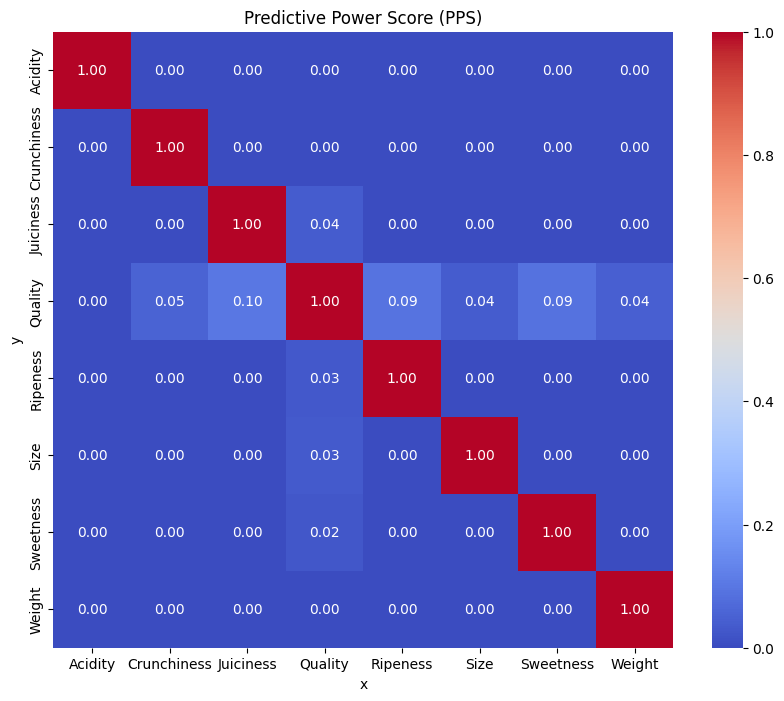

In [31]:
# Calcular o PPS entre as variáveis independentes e a variável dependente
pps_matrix = pps.matrix(df2)

# Ajustar Matriz para Plot
pps_matrix_pivot = pps_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Plotar a matriz de PPS
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Predictive Power Score (PPS)')
plt.show()

In [32]:
# Exemplo de PPS entre as variáveis
pps.score(df2, 'Weight', 'Quality')

{'x': 'Weight',
 'y': 'Quality',
 'ppscore': 0.043336673346693444,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.499,
 'model_score': 0.477375,
 'model': DecisionTreeRegressor()}

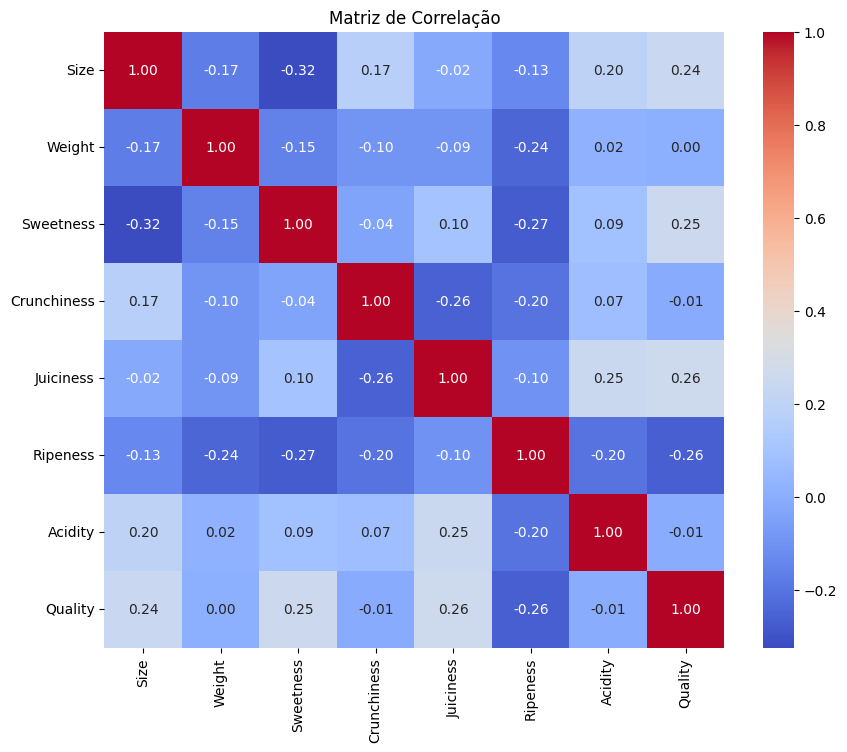

In [33]:
# Calcular a matriz de correlação
correlation_matrix = df2.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [34]:
# Separar X e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [35]:
# Ajustar o modelo de regressão linear múltipla
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

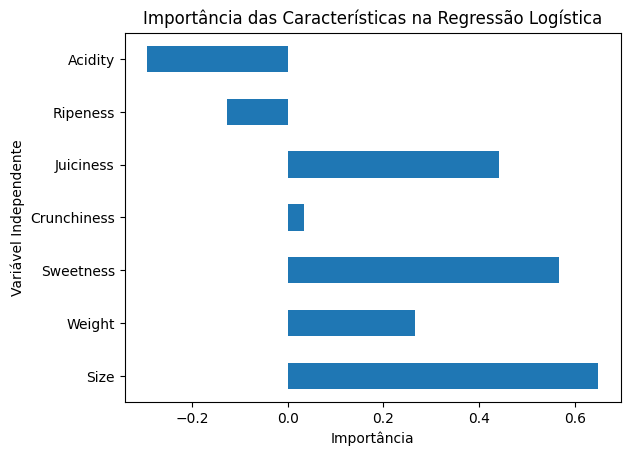

In [39]:
# Avaliar a importância das características com base nos coeficientes do modelo
feature_importance = pd.Series(model.coef_[0], index=model.feature_names_in_)
feature_importance.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Variável Independente')
plt.title('Importância das Características na Regressão Logística')
plt.show()